 <table style="background-color: white;width:100%;">
    <tr style="display:none">
        <td></td>
        <td></td>
    </tr>
    <tr style="height:3em">
        <td style="width:20%;align:left"><img src="iut_bordeaux.jpg"></td>
        <td style="width:60%;font: bold 2em 'Fira Sans', serif;text-align:center"> TP  1<br>Table de vérité et crible</td>
        <td style="width:20%;font: bold 1.3em 'Fira Sans', serif;vertical-align:top;">R01.06<i></i></td>
    </tr>
</table>

## Table de vérité

Python possède trois opérateurs booléens : `and`, `or`, `not`.     
On peut composer ces opérateurs pour obtenir des conditions booléennes complexes.  
Par exemple , a et b étant des booléens :

**a and ( b or (not a))** réprésente la proposition 
$a \wedge ( b \vee \overline a)$.

#### Exercice 1

Tester et comprendre :

```python
a=True
b=False
c = a and (not b)
print(c)
d=not(a or b)
print(d)
for a in [True,False]:
    print(a)
```

In [1]:
a=True
b=False
c = a and (not b)
print(c)
d=not(a or b)
print(d)
for a in [True,False]:
    print(a)

True
False
True
False


#### Exercice 2

Ecrire une fonction `implies` qui prend deux paramètres booléens $a$ et $b$ et retourne le booléen $a \implies b$.

En utilisant deux boucles et cette fonction `ìmplies`, établir la table de vérité de $a \implies b$.

Pour obtenir un affichage correct, se renseigner sur la fonction `format`ou une chaîne formatée.

In [2]:
P=[True,False]

def implies(a,b):
    return not(a) or b
print(implies(True,False))

print("|{:^10} | {:^10} | {:^10} |".format("a","b","a => b"))
for p in P:
    for q in P:
        impl=implies(p,q)
        #print("|{:^10} | {:^10} | {:^10} |".format(p,q,impl))
        print(f"|{p:^10} | {q:^10} | {impl:^10} |")

False
|    a      |     b      |   a => b   |
|    1      |     1      |     1      |
|    1      |     0      |     0      |
|    0      |     1      |     1      |
|    0      |     0      |     1      |


#### Exercice 3

Etablir de même la table de vérité de 
$$ p \iff (q \implies ( r \vee \overline q))$$

In [3]:
def equiv(a,b):
    return implies(a,b) and implies(b,a)
        
def fonction_logique(p,q,r):
    return equiv(p,implies(q,r or( not q)))

print("|{:^10}|{:^10}|{:^10}|{:^10}|".format("p","q","r","f"))
for p in P:
    for q in P:
        for r in P:
            f=fonction_logique(p,q,r)
            print("|{:^10}|{:^10}|{:^10}|{:^10}|".format(p,q,r,f))
            #print(f"|{p:^10}|{q:^10}|{r:^10}|{f:^10}|")
    

|    p     |    q     |    r     |    f     |
|    1     |    1     |    1     |    1     |
|    1     |    1     |    0     |    0     |
|    1     |    0     |    1     |    1     |
|    1     |    0     |    0     |    1     |
|    0     |    1     |    1     |    0     |
|    0     |    1     |    0     |    1     |
|    0     |    0     |    1     |    0     |
|    0     |    0     |    0     |    0     |


## Crible d’Eratosthène.

Le crible d’Eratosthène est un procédé qui permet de trouver tous les nombres premiers inférieurs à un certain entier naturel donné N. 

Cet algorithme procède par élimination :
* On envisage au départ que tous les nombres de 1 à N soient premiers.
* On élimine 0 et 1.
* 2 est encore dans la liste, donc on considère qu’il est premier, mais on élimine de la liste tous ses mutliples.
* 3 est encore dans la liste, donc on considère qu’il est premier, mais on élimine de la liste tous ses mutliples.
* 4 n’est plus dans la liste, car il a été éliminé lors de l’élimination des multiples de 2.
* etc.

En pratique, on s’arrête dès que l’on dépasse $\sqrt{N}$.

1 . Expliquer pourquoi cette condition est valide ?

 Tout entier naturel $n, n \geq 2$, admet un diviseur premier.  
Si $n$ n’est pas premier, alors il admet un diviseur premier $p$ tel que : $2\leq p\leq \sqrt{n}$

* Si $n$ est premier, il admet donc un diviseur premier : lui-même.
* Si $n$ n’est pas premier, l’ensemble des diviseurs $d$ de $n$ tel que : $2 \leq d < n$ n’est pas vide. Il admet donc un plus petit élément $p$. Si $p$ n’était pas premier, il admettrait un diviseur $d'$ tel que $2 \leq  d' < p$ qui diviserait $n$.   Ceci est impossible car p est le plus petit. Donc $p$ est premier.  
* On a donc $p$ premier et $n = p × q$ avec $p \leq q$.  
En multipliant cette inégalité par $p$, on obtient :
$$p^2\leq pq \implies p^2 \leq  n \text{ soit } p \leq \sqrt{n}$$

2 . Créer une fonction python `eratosthene` prenant en argument un nombre N et qui renvoie la liste des nombres premiers jusqu’à N.  

Pour cela :

* Créer une liste de booleens de taille N+1,tous de valeur `True`.
* Mettre d’office les éléments de rang 0 et 1 à `False`.
* Faire tourner l'algorithme à partir de 2.
* Une fois le travail terminé, on affiche les rangs des booléens dont la valeur est `True`.

In [4]:
from math import sqrt

def erast(N):
    #L=list(range(N+1))
    #for i in L:
    #   L[i]=True
    # ou
    #L=[True]*(N+1)
    # ou
    
    L=[True for i in range(N+1)]
    L[0],L[1]=False,False

    for i in range(int(sqrt(N)+1)):
        if L[i]:       # ou if L[i]==True:
            j=2*i
            while j<=N:
                if L[j]:
                    L[j]=False
                j=j+i
    
    NombrePremier=[];
    for i in range(len(L)):
        if L[i]==True :
            NombrePremier.append(i)
            
    return NombrePremier
    
    ##return [i for i,e in enumerate(L) if e]
    ## enumerate permet de récupérer la clé et la valeur dans une liste

print(erast(97))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [5]:
from math import sqrt

def erast(N):
 
    
    L=[True for i in range(N+1)]
    L[0],L[1]=False,False

    for i in range(int(sqrt(N)+1)):
        if L[i]:       # ou if L[i]==True:
            k=2
            
            while k*i<=N:
                j=k*i
                if L[j]:
                    L[j]=False
                k=k+1
    
    NombrePremier=[]
    for i in range(len(L)):
        if L[i]==True :
            NombrePremier.append(i);
            
    return NombrePremier
    

print(erast(97))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


3 . En utilisant le module `time`, mesurer le temps d'execution de votre fonction `Eratosthene`, pour $N=100.....10^6$.   
Ce temps d'exécution semble-t-il linéaire par rapport à $N$ ?

In [6]:
import time

abs=[]
ord=[]

for p in range(2,7):
    N=10**p;
    abs.append(N)
    
    start = time.time()
    erast(N)
    end = time.time()
    elapsed = end - start
    ord.append(elapsed)
    print(f"Temps pour {N}: {elapsed:.4}ms")   
    print(f'rapport : {(elapsed*10**7)/N:.4}')

print(abs)
print(ord)

    ## Le 10^7 est juste pour obtenir des valeur lisible mais n'est pas obligatoire
    ## On peut parler d'une certaine linéarité 

Temps pour 100: 3.505e-05ms
rapport : 3.505
Temps pour 1000: 0.000447ms
rapport : 4.47
Temps pour 10000: 0.004314ms
rapport : 4.314
Temps pour 100000: 0.0468ms
rapport : 4.68
Temps pour 1000000: 0.4841ms
rapport : 4.841
[100, 1000, 10000, 100000, 1000000]
[3.504753112792969e-05, 0.0004470348358154297, 0.00431370735168457, 0.046804189682006836, 0.4840707778930664]


En utilisant le module matplotlib.pyplot https://matplotlib.org/stable/tutorials/introductory/pyplot.html, tracer un graphique ayant en abscisse $N$ et en ordonnée le temps d'exécution.

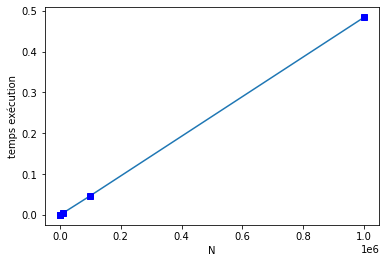

In [7]:
import matplotlib.pyplot as plt  ## le "as" permet d'utiliser un alias
plt.plot(abs,ord)
#plt.plot(abs,ord,"ro")   # r: red o : un rond
plt.plot(abs,ord,"bs")  # b : blue s : square (et il y en a d'autres dans la doc)
plt.xlabel('N') # label sur les axes
plt.ylabel('temps exécution')
plt.show()  # indispensable pour afficher le graphique

On note $\pi(n)$ le nombre de nombres premiers inférieurs ou égaux à $n$. 

A l'aide de la fonction `Eratosthene`, donner les valeurs de $\pi(n)$ pour $n = 10^2, \ 10^3,\dots 10^6$.

On admet que $\pi(10^9) = 50 847 534$.

Comparer $\pi(n)$ à $\dfrac{n}{\ln(n)}$.  
Présenter les résultats sous forme d'un tableau, puis d'un graphique réalisé avec matplotlib.pyplot.


|   100    |    25    |   21.7147|
|   1000   |   168    |   144.765|
|  10000   |   1229   |   1085.74|
|  100000  |   9592   |   8685.89|
| 1000000  |  78498   |   72382.4|


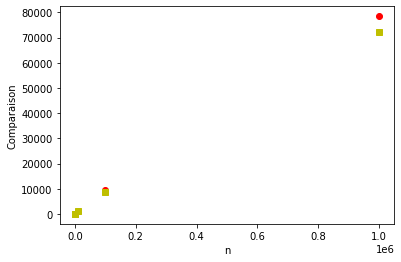

In [8]:
# Attention, si le nombre est trop grand, ça plante le noyau, il faut alors le relancer !


from math import log
pi=[]
abs=[]
nln=[]

maxi=10**6
n=100
while n<=maxi:
    abs.append(n)
    pi.append(len(erast(n)))
    nln.append(n/log(n)) ## On insère les n/ln(n) dans une liste
    n*=10

    

for i in range(len(abs)):
    print(f"|{(abs[i]):^10}|{(pi[i]):^10}|{nln[i]:10.6}|")
    

plt.plot(abs,pi,"ro")
plt.plot(abs,nln,"ys")

plt.xlabel('n')
plt.ylabel('Comparaison')
plt.show()
    

    

Ecrire une conjecture sur le nombre de nombres premiers inférieurs à un entier N.

Le nombre de nombres premiers inférieurs à N est à peu près identique à $\dfrac{N}{ln(N)}$.  
